In [7]:
import json
import string
import pandas as pd
import re
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from nltk import ngrams
from langdetect import detect, DetectorFactory
from difflib import get_close_matches as gcm

In [8]:
skills = pd.read_csv('skills_db/skill.csv')
skills.head()

,skill_id,skill
0,150,Applied Science
1,163,Art
2,322,Business
3,548,Computer Science
4,714,Data Science


In [9]:
sk_list = skills['skill'].tolist()
len(sk_list)

3095

In [10]:
with open('resource/job_infos_scrape.json') as f:
    jobs = json.load(f)

len(jobs)

19680

In [11]:
jobs['0']

{'title': 'SALES ASSOCIATE',
 'job_details': '* Under supervision and perform duties to provide technical product assistance/knowledge to customers in order to generate new and repeat sales.\n* Assist customers in the selection of the best products that suited to their needs and desires and explain use, operation, care of the merchandise products and services to customers.\n* Explain the terms of sales, availability of the product and delivery dates and related information and process orders to customers.\n* Handle customers inquiries and complaint.\n* Keep display items clean and displayable and overall cleanliness of the branch.\n* To  handle  any  other  job  as  may be  assigned  by  the  superior.\n\nLocation : Tropicana Aman, Denai Alam, Wisma WCC, Puchong, Bandar Botanik, Sri Petaling, Pandan Indah, Rawang, Sungai Buloh, Kota Damansara, Kajang, Bangi , Balakong, USJ Taipan, Kota Kemuning, Shah Alam.',
 'requirement': 'Permanent| 3 Shift Time |STPM / A Level or Equivalent|Today',

In [12]:
rs = []
i = 0

for j in jobs:
    rs.append(jobs[j]['requirement'].split('|')[2])

set(rs)

{"Bachelor's or Equivalent",
 'Diploma / Advanced Diploma / Higher Graduate Diploma / DVM / DKM Level 4 / DLKM Level 5',
 'Diploma / Advanced Diploma / Higher Graduate Diploma / DVM /…',
 'Diploma / Advanced Diploma / Higher Graduate…',
 'Doctoral (PhD) or Equivalent',
 "Master's or Equivalent",
 'PMR / PT3 or Equivalent',
 'Primary Education or Below',
 'SPM / O Level / SKM Level 1 / SKM Level 2 / SKM Level 3 or Equivalent',
 'SPM / O Level / SKM Level 1 / SKM Level 2 / SKM Level 3 or…',
 'STPM / A Level or Equivalent'}

In [13]:
def extract_skills(info):
    words = list(set(re.sub('[\n|,|.|/|\(|\)]', ' ', info).lower().split()))
    bigrams = [' '.join(g) for g in ngrams(words, 2)]
    trigrams = [' '.join(g) for g in ngrams(words, 3)]
    results = []
    for skill in sk_list:
        s = skill.lower()
        if '(' in s:
            abb = s[s.find("(")+1:s.find(")")]
            if len(gcm(abb, words, cutoff=0.95)) > 0:
                results.append(skill)
                continue
            s = re.sub(r"[\(].*?[\)]", "", s)
        s2 = s.split()
        if len(s2) == 1:
            if len(gcm(s, words, cutoff=0.9)) > 0:
                results.append(skill)
        elif len(s2) == 2:
            if len(gcm(s, words, cutoff=0.85)) > 0:
                results.append(skill)
        elif len(s2) == 3:
            if len(gcm(s, trigrams, cutoff=0.8)) > 0:
                results.append(skill)
        else:
            if len(gcm(s, trigrams, cutoff=0.7)) > 0:
                results.append(skill)
    return results

In [15]:
i = 0
job_info_list = []
DetectorFactory.seed = 42
initial = dt.now()
interval = dt.now()
print_every = 500

for j in jobs:
    i += 1
    if i % print_every == 0:
        print("{} jobs processed. Time taken: {}".format(i, dt.now() - interval))
        interval = dt.now()
    job = jobs[j]
    all_info = job['title'] + ' ' + job['job_details']
    job_type = job['requirement'].split('|')[0]
    education = job['requirement'].split('|')[2]
    if len(job['job_details']) < 3:
        language = None
    else:
        language = detect(job['job_details'])
    skills = extract_skills(all_info)
    job_info_list.append({
        'job_title': job['title'],
        'job_details': job['job_details'],
        'job_type': job_type,
        'education_requirement': education,
        'language': language,
        'skills_required': skills,
        'no_skills_required': len(skills)})

print("Total time taken: {}".format(dt.now() - initial))

500 jobs processed. Time taken: 0:03:29.833196
1000 jobs processed. Time taken: 0:03:17.678279
1500 jobs processed. Time taken: 0:03:32.146844
2000 jobs processed. Time taken: 0:03:20.760168
2500 jobs processed. Time taken: 0:03:54.796798
3000 jobs processed. Time taken: 0:02:06.826951
3500 jobs processed. Time taken: 0:03:21.240380
4000 jobs processed. Time taken: 0:03:46.470786
4500 jobs processed. Time taken: 0:03:27.395169
5000 jobs processed. Time taken: 0:03:22.553503
5500 jobs processed. Time taken: 0:03:11.888057
6000 jobs processed. Time taken: 0:03:06.733814
6500 jobs processed. Time taken: 0:03:39.735435
7000 jobs processed. Time taken: 0:03:14.074949
7500 jobs processed. Time taken: 0:03:34.103895
8000 jobs processed. Time taken: 0:03:26.692215
8500 jobs processed. Time taken: 0:03:59.744204
9000 jobs processed. Time taken: 0:03:25.559526
9500 jobs processed. Time taken: 0:03:01.445648
10000 jobs processed. Time taken: 0:03:02.309910
10500 jobs processed. Time taken: 0:03:2

## Analysis

In [16]:
df = pd.DataFrame.from_dict(job_info_list)
df.head()

,job_title,job_details,job_type,education_requirement,language,skills_required,no_skills_required
0,SALES ASSOCIATE,* Under supervision and perform duties to prov...,Permanent,STPM / A Level or Equivalent,en,"[Sales, Operations, Process, Service, Selectio...",6
1,SIGN HOUSE ADVERTISING,Kelebihan diberi kepada yang mempunyai kemahir...,Permanent,Bachelor's or Equivalent,id,"[Adobe, Advertising]",2
2,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,Diploma / Advanced Diploma / Higher Graduate…,en,"[Operations, Distribution]",2
3,Petugas PDK,"1. Bertanggungjawab kepada penyelia PDK, jawat...",Permanent,Bachelor's or Equivalent,id,[],0
4,MR DIY (M) SDN BHD,"Receive stock, checking & distribution item re...",Permanent,SPM / O Level / SKM Level 1 / SKM Level 2 / SK...,en,"[Operations, Distribution]",2


In [17]:
df.to_csv('resource/myfuturejobs_skills2.csv', index=False)

In [18]:
df.describe(include='all')

,job_title,job_details,job_type,education_requirement,language,skills_required,no_skills_required
count,19680,19680,19680,19680,19670,19680,19680.000000
unique,4856,3296,6,11,26,3435,NaN
top,General Worker,Sales assistants represent the direct contact ...,Permanent,SPM / O Level / SKM Level 1 / SKM Level 2 / SK...,en,[],NaN
freq,128,167,15653,7988,16950,2718,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.593140
std,NaN,NaN,NaN,NaN,NaN,NaN,6.754225
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [19]:
df['job_type'].describe()

count         19680
unique            6
top       Permanent
freq          15653
Name: job_type, dtype: object

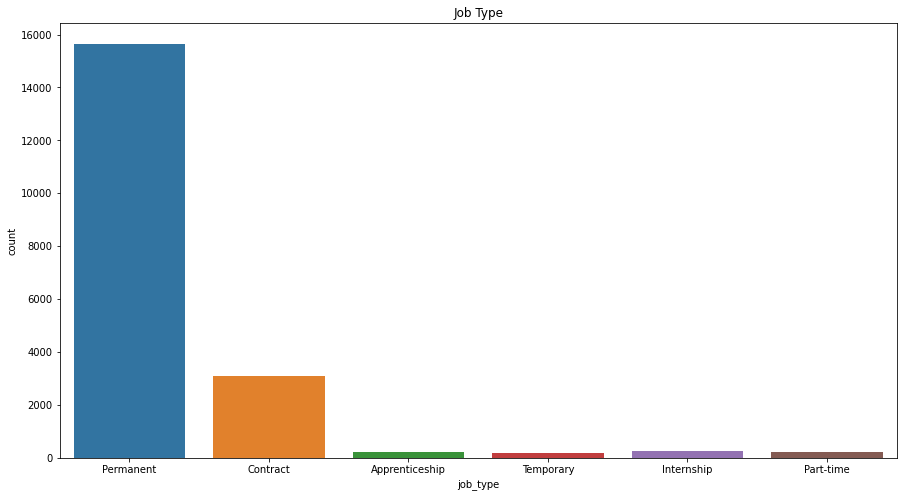

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_type', data=df).set_title('Job Type');

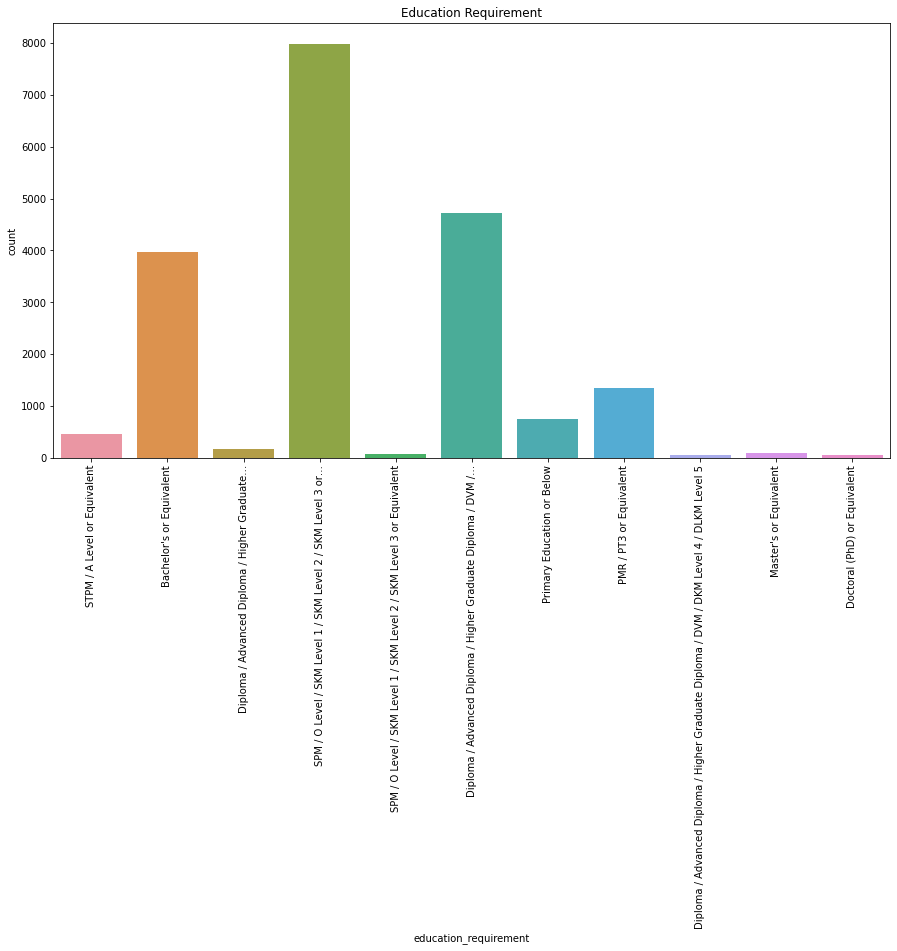

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='education_requirement', data=df).set_title('Education Requirement')
plt.xticks(rotation=90);

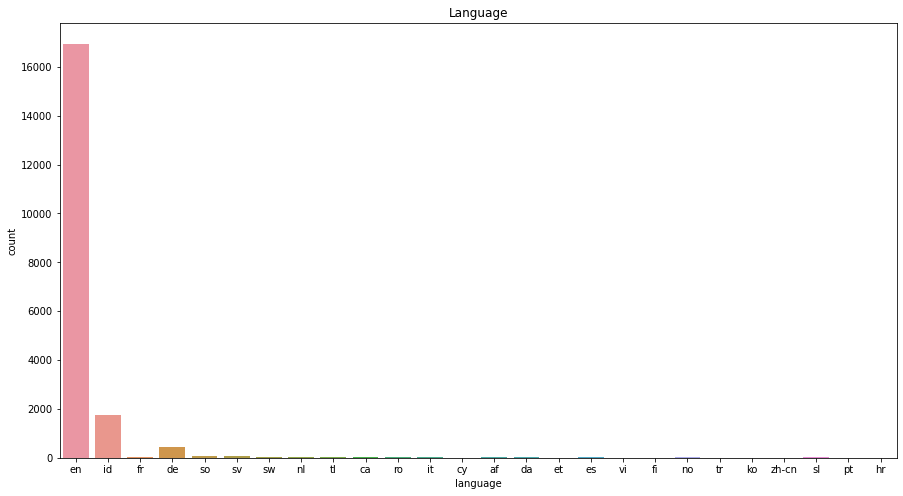

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='language', data=df).set_title('Language');

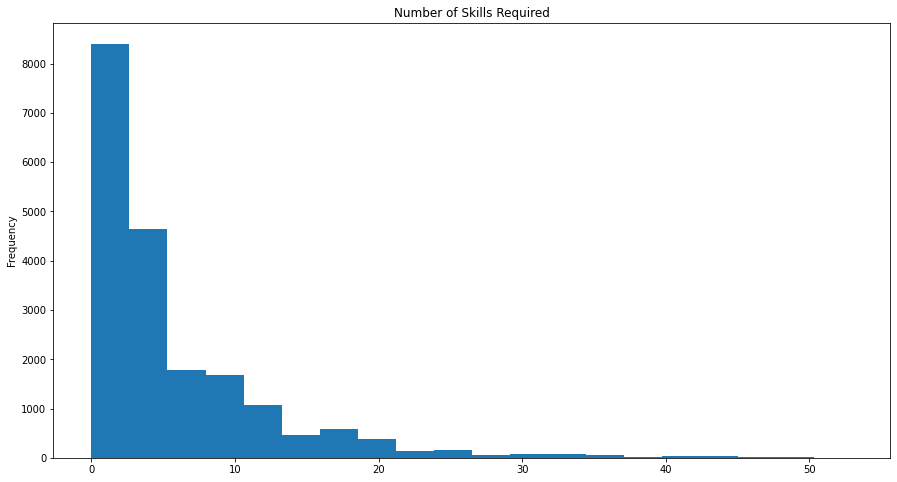

In [23]:
plt.figure(figsize=(15,8))
df['no_skills_required'].plot.hist(bins=20, title='Number of Skills Required');

## Data Percentages

### Language
#### English

In [24]:
len(df.loc[df['language'] == 'en']) * 100 / len(df)

86.1280487804878

### Skills

#### No skills

In [25]:
len(df.loc[df['no_skills_required'] == 0]) * 100 / len(df)

13.810975609756097

In [26]:
df.loc[df['no_skills_required'] == 0]['job_details'].unique().tolist()

['1. Bertanggungjawab kepada penyelia PDK, jawatankuasa PDK dan PKMD serta menjalankan tugas2 yang diarahkan oleh mereka dari semasa ke semasa.\n2. Bertanggungjawab mendaftar OKU dengan Jabatan Kebajikan Masyarakat pada minggu pertama kehadiran OKU di PDK.\n3. Bertanggungjawab menjalankan aktiviti pemulihan , pembelajaran dan kegiatan lain bagi OKU mengikut nisbah 1:5 mengikut kurikulum yang telah ditetapkan.\n4. Menggunakan daya kreativiti bagi aktiviti OKU\n5. Mengurus dan mengemaskini rekod di PDK\n6. Mengadakan lawatan ke rumah keluarga OKU seminggu sekali mengikut jadual yang telah ditetapkan oleh jawatankuasa PDK dengan persetujuan keluarga terbabit.\n7.Menjalankan tugas seperti yang diarahkan oleh jawatankuasa pdk dan dinasihatkan oleh PKMD dari semasa ke semasa berkaitan pengurusan PDK.',
 '*Mempunyai sekurang kurangnya SPM atau kelayakan yang setaraf dengannya\n*Memiliki lesen sekurang kurangnya B2\n*Boleh bekerja lebih masa \n*Dapat berkomunikasi dengan baik',
 'Sila rujuk di

In [ ]:
df['skills_required'].tolist()

#### More than 10 skills

In [27]:
len(df.loc[df['no_skills_required'] > 10]) * 100 / len(df)

16.163617886178862